In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn

In [3]:
accidentalidad = pd.read_csv("accidentalidad_Caldas.csv")

In [4]:
print("Primeras filas")
accidentalidad.head()

Primeras filas


,RADICADO,FECHA 1,HORA,DÍA DE LA SEMANA,CLASE,DIRECCIÓN,GRAVEDAD,BARRIO,DISEÑO
0,2897,2004-11-22,5:32:00,LUNES,CHOQUE,SIN INFORMACION,DAÑOS,DESCONOCIDO,TRAMO DE VIA
1,2898,2004-11-10,6:40:00,MIERCOLES,CHOQUE,SIN INFORMACION,DAÑOS,CENTRO,INTERSECCION
2,2899,2004-11-29,10:10:00,LUNES,CHOQUE,SIN INFORMACION,DAÑOS,DESCONOCIDO,LOTE O PREDIO
3,2900,2004-11-27,2:45:00,SABADO,CHOQUE,SIN INFORMACION,DAÑOS,DESCONOCIDO,TRAMO DE VIA
4,2901,2004-11-28,12:01:00,DOMINGO,ATROPELLO,SIN INFORMACION,HERIDOS,DESCONOCIDO,TRAMO DE VIA


In [5]:
print("Estadísticas descriptivas")
accidentalidad.describe()

Estadísticas descriptivas


,RADICADO
count,12635.000000
mean,9364.794460
std,3714.727887
min,2897.000000
25%,6169.500000
50%,9354.000000
75%,12586.500000
max,15819.000000


In [6]:
print("Información General")
accidentalidad.info()

Información General
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12635 entries, 0 to 12634
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   RADICADO          12635 non-null  int64 
 1   FECHA 1           12635 non-null  object
 2   HORA              12635 non-null  object
 3   DÍA DE LA SEMANA  12635 non-null  object
 4   CLASE             12635 non-null  object
 5   DIRECCIÓN         12635 non-null  object
 6   GRAVEDAD          12635 non-null  object
 7   BARRIO            12635 non-null  object
 8   DISEÑO            12635 non-null  object
dtypes: int64(1), object(8)
memory usage: 888.5+ KB


In [7]:
accidentalidad['HORA'] = pd.to_datetime(accidentalidad['HORA'], format='%H:%M:%S', errors='coerce').dt.hour
accidentalidad['DÍA DE LA SEMANA'] = accidentalidad['DÍA DE LA SEMANA'].str.strip().str.capitalize()
accidentalidad = accidentalidad.dropna(subset=['HORA', 'DÍA DE LA SEMANA'])
print("\nDatos después del preprocesamiento:")
print(accidentalidad.head())



Datos después del preprocesamiento:
   RADICADO     FECHA 1  HORA DÍA DE LA SEMANA      CLASE        DIRECCIÓN  \
0      2897  2004-11-22     5            Lunes     CHOQUE  SIN INFORMACION   
1      2898  2004-11-10     6        Miercoles     CHOQUE  SIN INFORMACION   
2      2899  2004-11-29    10            Lunes     CHOQUE  SIN INFORMACION   
3      2900  2004-11-27     2           Sabado     CHOQUE  SIN INFORMACION   
4      2901  2004-11-28    12          Domingo  ATROPELLO  SIN INFORMACION   

  GRAVEDAD       BARRIO         DISEÑO  
0    DAÑOS  DESCONOCIDO   TRAMO DE VIA  
1    DAÑOS       CENTRO   INTERSECCION  
2    DAÑOS  DESCONOCIDO  LOTE O PREDIO  
3    DAÑOS  DESCONOCIDO   TRAMO DE VIA  
4  HERIDOS  DESCONOCIDO   TRAMO DE VIA  


Dia de la semana con más accidentes


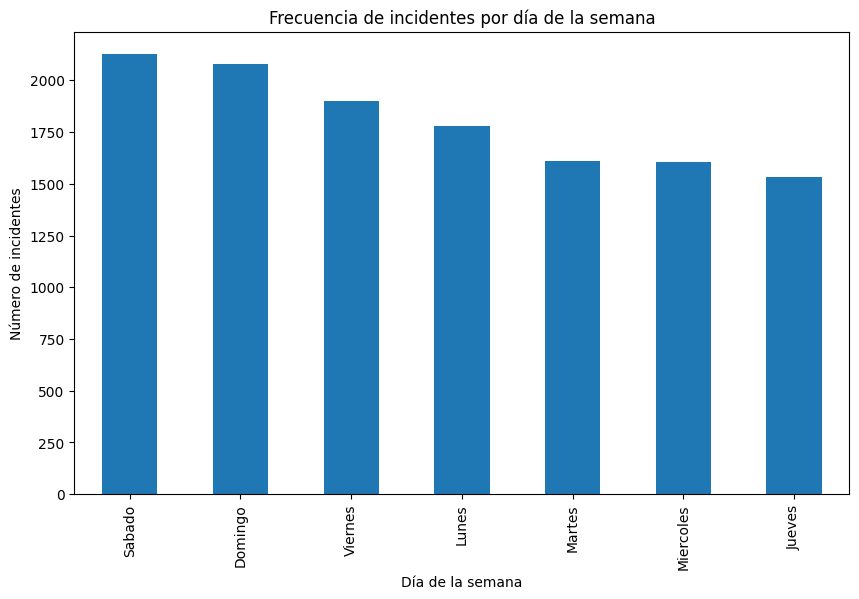

In [8]:
print("Dia de la semana con más accidentes")
day_counts = accidentalidad['DÍA DE LA SEMANA'].value_counts()
plt.figure(figsize=(10, 6))
day_counts.plot(kind='bar')
plt.title("Frecuencia de incidentes por día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Número de incidentes")
plt.savefig("frecuencia-incidentes")
plt.show()

Gravedad de accidentes


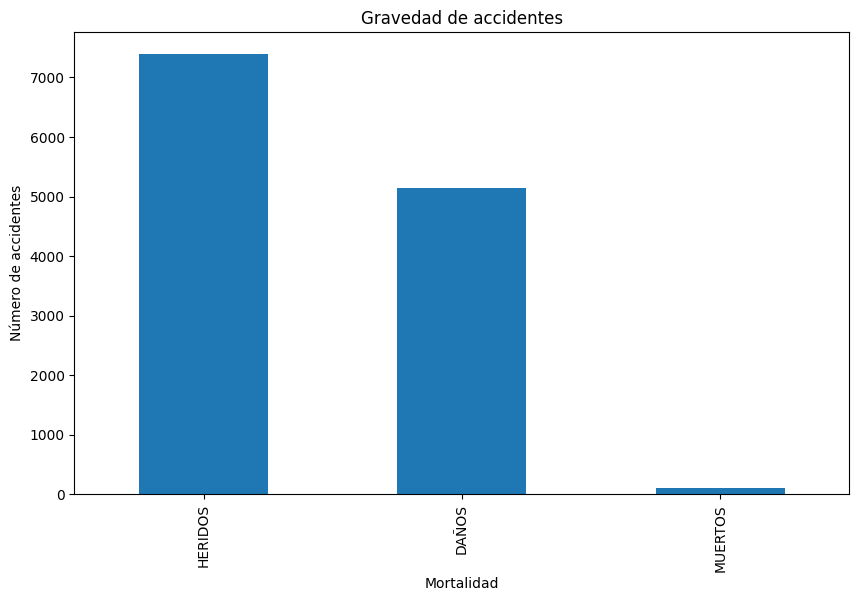

In [84]:
print("Gravedad de accidentes")
gravedad = accidentalidad['GRAVEDAD'].value_counts()
plt.figure(figsize=(10, 6))
gravedad.plot(kind='bar')
plt.title("Gravedad de accidentes")
plt.xlabel("Mortalidad")
plt.ylabel("Número de accidentes")
plt.savefig("gravedad-de-accidentes")
plt.show()

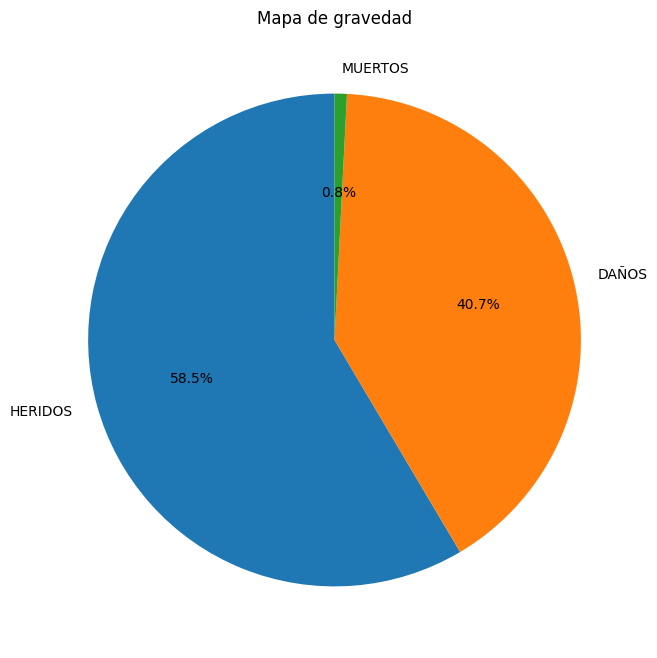

In [9]:
severity_counts = accidentalidad['GRAVEDAD'].value_counts()
plt.figure(figsize=(8, 8))
severity_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Mapa de gravedad")
plt.ylabel("")
plt.savefig("mapa-de-gravedad")
plt.show()

In [10]:
print("\nResumen del análisis:")
print(f"Total de registros analizados: {len(accidentalidad)}")
print(f"Días con más incidentes:\n{day_counts.head(3)}")
print(f"Distribución de gravedad:\n{severity_counts}")

print("\nConclusiones:")
print("1. Los días laborales presentan mayor número de incidentes.")
print("2. La mayoría de los incidentes son de gravedad 'Leve'.")


Resumen del análisis:
Total de registros analizados: 12635
Días con más incidentes:
DÍA DE LA SEMANA
Sabado     2126
Domingo    2077
Viernes    1901
Name: count, dtype: int64
Distribución de gravedad:
GRAVEDAD
HERIDOS    7393
DAÑOS      5140
MUERTOS     102
Name: count, dtype: int64

Conclusiones:
1. Los días laborales presentan mayor número de incidentes.
2. La mayoría de los incidentes son de gravedad 'Leve'.
